In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from pnpl.datasets import LibriBrainPhoneme
import json


def plot_confusion_matrix(output_json):
    with open(output_json, "r") as f:
        data = json.load(f)
        data = {
            "targets": data["targets"],
            "preds": data["preds"],
        }

    fig, ax = plt.subplots(figsize=(16, 12))

    val_dataset = LibriBrainPhoneme(
        data_path=f"data/",
        partition="validation",
        tmin=0.0,
        tmax=0.5
    )

    cm = confusion_matrix(data["targets"], data["preds"])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[val_dataset.id_to_phoneme[i] for i in range(len(val_dataset.id_to_phoneme))])

    disp.plot(ax=ax, cmap=plt.cm.Blues, values_format="d")

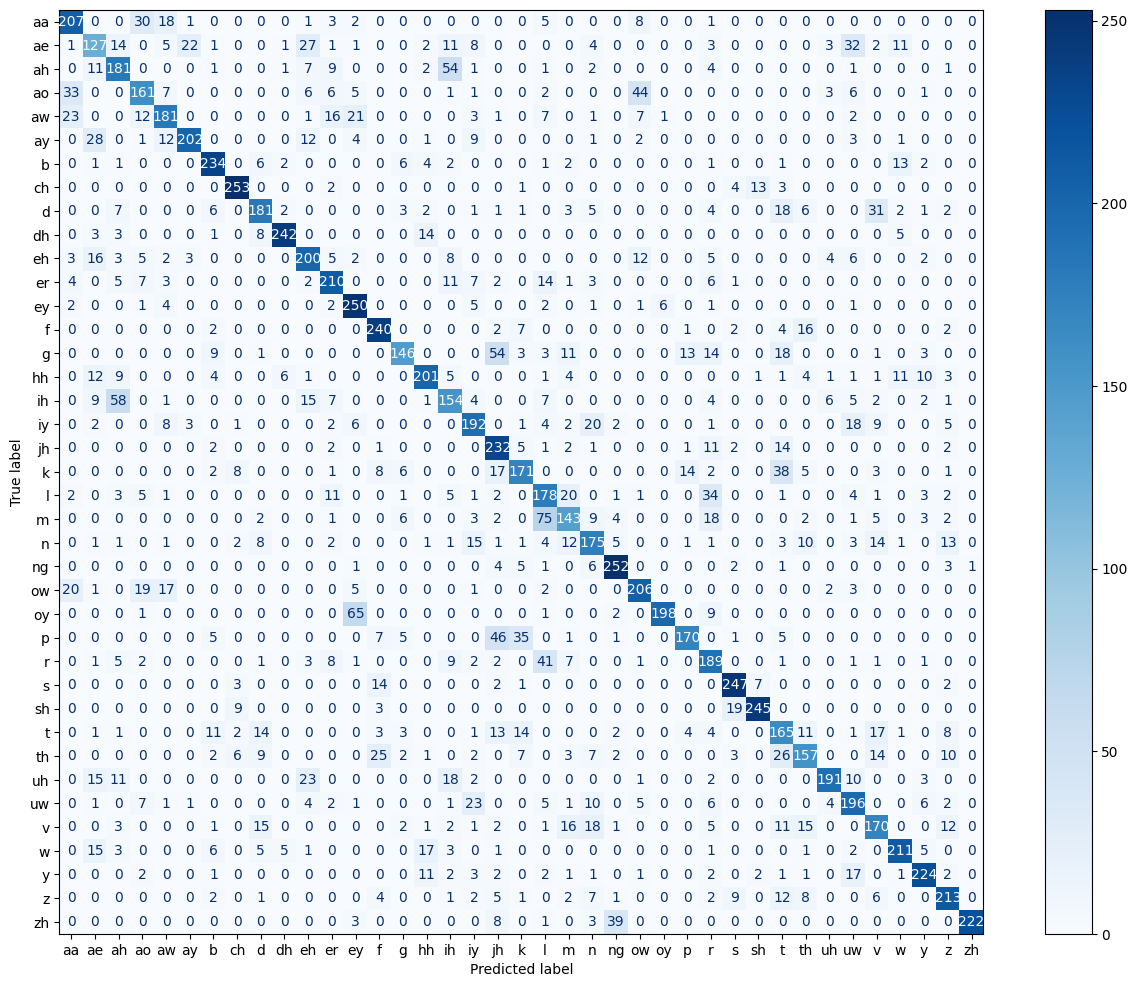

In [2]:
output_json = "out/phoneme-baseline-xl/val-best-baseline-xl-hpo-2/results.json"
# output_json = "out/phoneme-megt/val-best-megt-s-hpo-2/results.json"

plot_confusion_matrix(output_json)